# About the Author

Hi there! I'm Martin Macchi, an aspiring data analyst with a passion for learning and growing in the world of data. As I develop my skills and explore various techniques in data analysis, I'm excited to dive deeper into the field with the potential to become a data scientist. Join me on this journey as I uncover insights and make data-driven decisions along the way!

martinezequielmacchi@gmail.com

[![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/martin-ezequiel-macchi-5392072b3/) 
[![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/martinezequiel844) 
[![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/martinezequielmacchi)


# Our Dataset

This dataset includes annual county-level pesticide use estimates for 423 pesticides (active ingredients) applied to agricultural crops grown in the contiguous United States. Two different methods were used to estimate a range of pesticide use for all states except California. Both low and high estimate methods incorporated proprietary surveyed rates for United States Department of Agriculture Crop Reporting Districts, but the estimates differed in how they treated situations when a district was surveyed and pesticide use was not reported. Low estimates assumed zero use in the district for that pesticide; however, high estimates treated the unreported use of pesticides as missing data and estimated the pesticide usage from neighboring locations within the same region.

| Column          | Description                            |
|-----------------|----------------------------------------|
| COMPOUND        | Pesticide name                         |
| YEAR            | Year of measurement                    |
| STATE_CODE      | State code                             |
| COUNTY_CODE     | County code                            |
| LOW_ESTIMATE    | Low estimation method in kilograms     |
| HIGH_ESTIMATE   | High estimation method in kilograms    |
| COUNTY          | County name                            |
| STATE           | State abbreviated name                 |

# Our Goals

The objective of this analysis is to conduct a comprehensive risk assessment of the potential health impacts associated with pesticide use in agricultural settings across the contiguous United States. By utilizing the high estimate method, which accounts for unreported pesticide use through regional data interpolation, we aim to provide a more conservative and realistic representation of pesticide exposure. This approach allows for a better understanding of potential health risks that may arise from agricultural practices.

In addition to assessing the health impacts using high estimates, this study will also compare the low and high estimate methodologies. The low estimate method, which assumes zero pesticide use in surveyed districts where no data is reported, may underrepresent the actual exposure levels. By juxtaposing these two estimation methods, we can highlight discrepancies in risk assessment outcomes and draw meaningful conclusions about the implications of pesticide use on public health. Ultimately, this analysis aims to inform policy-making and risk management strategies to mitigate the adverse effects of pesticide exposure on human health.

**Our objectives:**

* Find states and counties with most pesticide usage.
* Analyse the distribution of estimating methods and pesticide usage by state.
* Trend analysis by year for compounds.
* Comparison for estimating methods.

In [29]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno
from scipy.stats import kurtosis
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

In [30]:
#Importing datasets
df2014 = pd.read_csv('/kaggle/input/pesticide-use/2014.csv')
df2015 = pd.read_csv('/kaggle/input/pesticide-use/2015.csv')
dfdict = pd.read_csv('/kaggle/input/pesticide-use/dictionary.csv')

print(df2014.head())
print(df2015.head())
print(dfdict.head())

  COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  HIGH_ESTIMATE
0    2,4-D  2014           1            1        1698.6         1885.5
1    2,4-D  2014           1            3        7513.6         8472.4
2    2,4-D  2014           1            5        2613.6         2889.4
3    2,4-D  2014           1            7        1259.2         1277.7
4    2,4-D  2014           1            9        7590.5         7756.1
                COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  \
0  1-Methyl Cyclopropene  2015          41            1           NaN   
1  1-Methyl Cyclopropene  2015          41           21           NaN   
2  1-Methyl Cyclopropene  2015          41           27           NaN   
3  1-Methyl Cyclopropene  2015          41           49           NaN   
4  1-Methyl Cyclopropene  2015          41           55           NaN   

   HIGH_ESTIMATE  
0            0.0  
1            0.1  
2            1.7  
3            0.1  
4            0.0  
   STATE_CODE  COUNTY

In [31]:
#Concatenating and joining

df_concat = pd.concat([df2014, df2015])
df = df_concat.merge(dfdict, on=['STATE_CODE', 'COUNTY_CODE'], how='left')
df.sample(5)

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
444130,Chlorantraniliprole,2015,47,63,2.4,2.4,Hamblen County,TN
732936,Thidiazuron,2015,48,207,311.4,311.4,Haskell County,TX
675771,Prothioconazole,2015,29,33,55.4,140.9,Carroll County,MO
362901,Thifensulfuron,2014,19,175,39.6,39.6,Union County,IA
684286,Pyridaben,2015,26,89,5.8,13.5,Leelanau County,MI


# Exploring and Cleaning Dataset

> Initial Dataframe

In [32]:
df.sample(5) #Sampling initial dataframe

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
379622,Trifloxystrobin,2014,6,67,124.7,124.7,Sacramento County,CA
418327,Aviglycine,2015,47,65,0.0,0.0,Hamilton County,TN
676349,Prothioconazole,2015,41,21,3.3,1221.5,Gilliam County,OR
347567,Tefluthrin,2014,21,81,NaN,8.7,Grant County,KY
42788,Boscalid,2014,24,39,0.7,0.7,Somerset County,MD


In [33]:
#Exploring initial dataframe
columns_info = []
for col in df.columns:
    columns_info.append({'Column_Name': col, 
                           'Data_Type': df[col].dtype, 
                           'NumUnique': df[col].nunique(), 
                           'Nulls': df[col].isnull().sum(), 
                           '%Null': ((df[col].isnull().sum()/len(df))*100).round(2), 
                           'Unique Sample': df[col].unique()
                          })
df_info = pd.DataFrame(columns_info)
df_info

,Column_Name,Data_Type,NumUnique,Nulls,%Null,Unique Sample
0,COMPOUND,object,413,0,0.00,"[2,4-D, 2,4-DB, 6-Benzyladenine, Abamectin, Ac..."
1,YEAR,int64,2,0,0.00,"[2014, 2015]"
2,STATE_CODE,int64,48,0,0.00,"[1, 4, 5, 6, 8, 9, 10, 12, 13, 16, 17, 18, 19,..."
3,COUNTY_CODE,int64,266,0,0.00,"[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25..."
4,LOW_ESTIMATE,float64,47680,241207,31.65,"[1698.6, 7513.6, 2613.6, 1259.2, 7590.5, 1318...."
5,HIGH_ESTIMATE,float64,55610,0,0.00,"[1885.5, 8472.4, 2889.4, 1277.7, 7756.1, 1408...."
6,COUNTY,object,1799,0,0.00,"[Autauga County, Baldwin County, Barbour Count..."
7,STATE,object,48,0,0.00,"[AL, AZ, AR, CA, CO, CT, DE, FL, GA, ID, IL, I..."


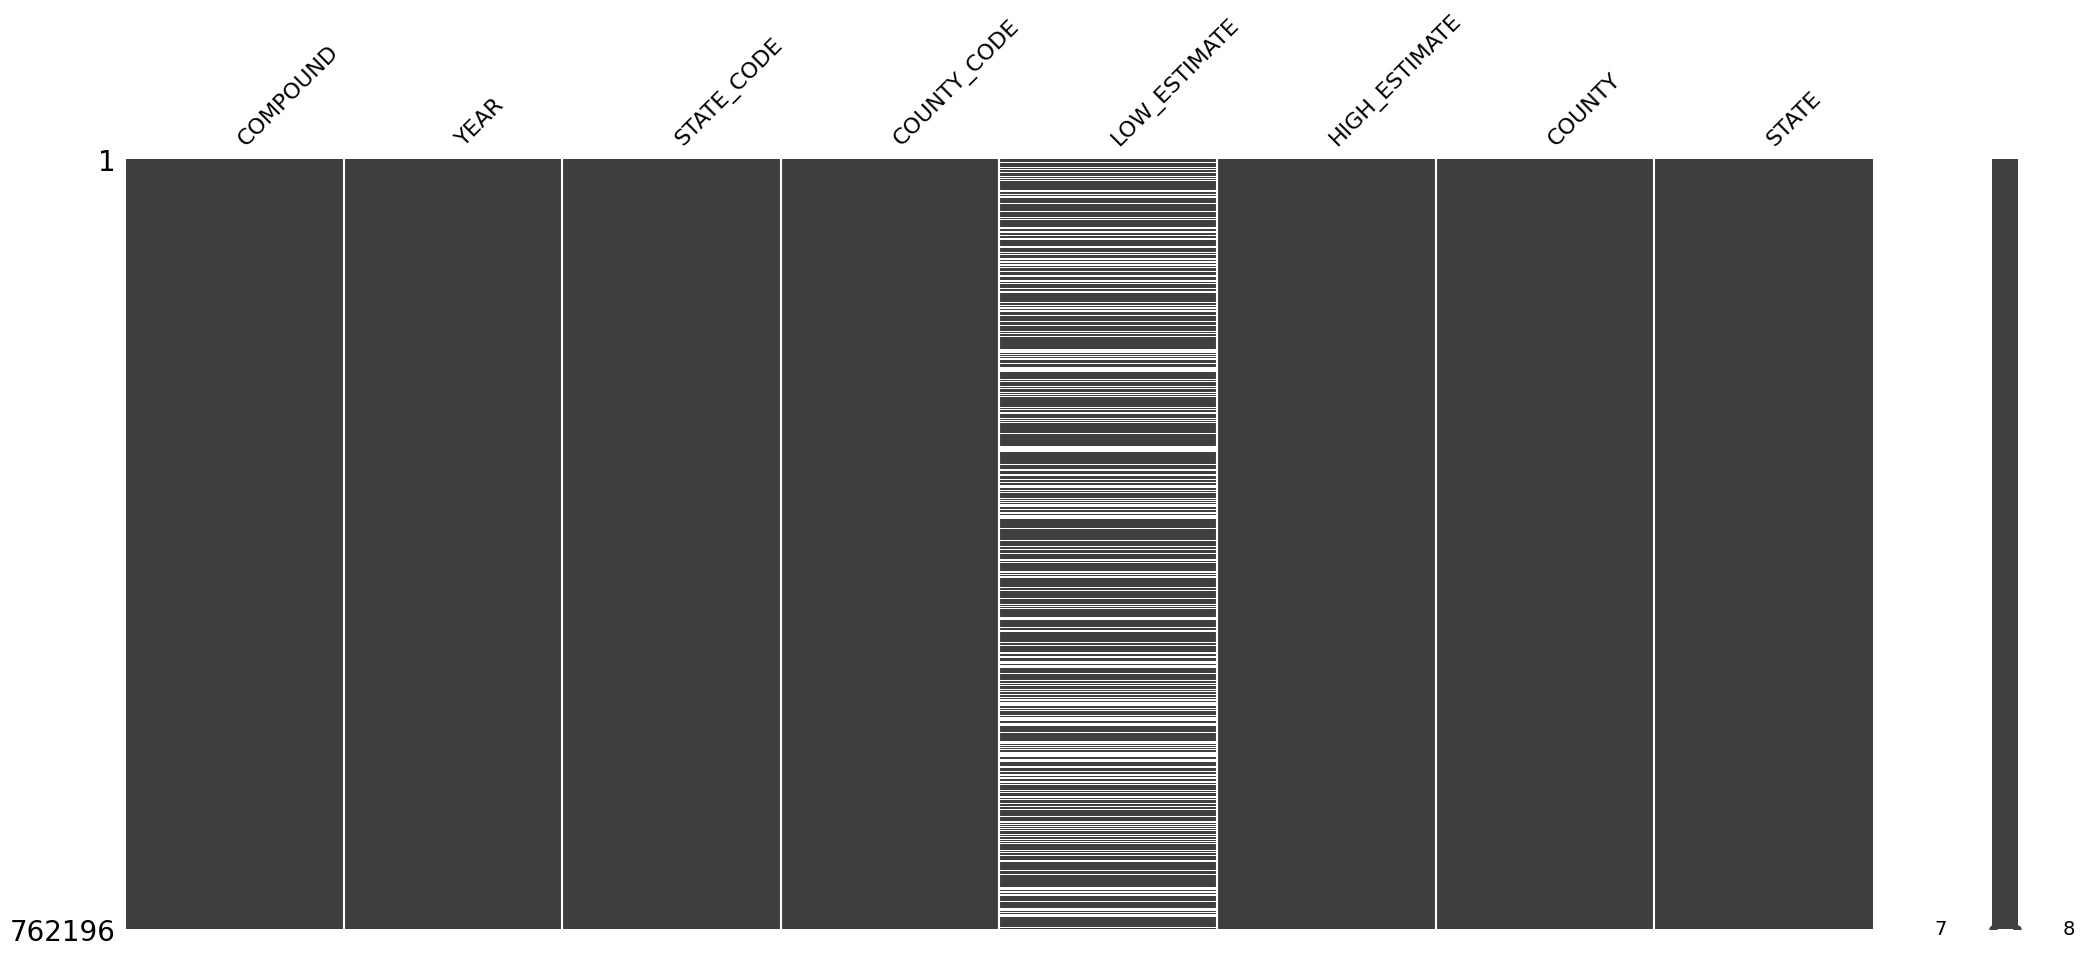

In [34]:
msno.matrix(df)
plt.tight_layout()
plt.show()

In [35]:
df_summary = df.describe().style.background_gradient(cmap='viridis')
df_summary

,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
count,762196.000000,762196.000000,762196.000000,520989.000000,762196.000000
mean,2014.485128,30.957291,94.823353,1496.135040,1182.862867
std,0.499779,14.666494,85.567998,18499.826776,15692.031480
min,2014.000000,1.000000,1.000000,0.000000,0.000000
25%,2014.000000,19.000000,35.000000,0.900000,1.500000
50%,2014.000000,30.000000,77.000000,12.100000,16.400000
75%,2015.000000,45.000000,129.000000,132.700000,140.500000
max,2015.000000,56.000000,810.000000,5507145.800000,5507145.800000


Which estimating method was used in California?

In [36]:
df_ca_nulls = df.loc[df['STATE'] == 'CA', ['LOW_ESTIMATE', 'HIGH_ESTIMATE']].isnull().sum() #Finding how many null values are in each CA row
df_ca_sum = df.loc[df['STATE'] == 'CA', ['LOW_ESTIMATE', 'HIGH_ESTIMATE']].sum() #Summing all values from both estimates columns

print(df_ca_nulls)
print(df_ca_sum)

LOW_ESTIMATE     0
HIGH_ESTIMATE    0
dtype: int64
LOW_ESTIMATE     59524168.1
HIGH_ESTIMATE    59524168.1
dtype: float64


Here we find that High Estimates method was applied in California since it does not have missing values in LOW_ESTIMATES and all the values sum of total of the LOW_ESTIMATES column is identical of the sum of total for the HIGH_ESTIMATE column.

> Preprocessing Dataframe

In [37]:
#Changing state abbreviations for their full names
us_states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

df['STATE'] = df['STATE'].map(us_states)

#Dropping unnecesary columns
df = df.drop(columns=['STATE_CODE', 'COUNTY_CODE'])

#Changing data types
df['COMPOUND'] = df['COMPOUND'].astype('category')
df['STATE'] = df['STATE'].astype('category')
df['COUNTY'] = df['COUNTY'].astype('category')

#Imputating missing values with 0
df['LOW_ESTIMATE'] = df['LOW_ESTIMATE'].fillna(0)

#Checking duplicated values
df.duplicated().sum()

#Converting LOW_ESTIMATE values for California to 0
df.loc[df['STATE'] == 'California', 'LOW_ESTIMATE'] = 0

print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of duplicated values: {df.duplicated().sum()}")
print(f"Number of missing values after imputation in LOW_ESTIMATE: {df['LOW_ESTIMATE'].isnull().sum()}")

Number of rows: 762196
Number of features: 6
Number of duplicated values: 0
Number of missing values after imputation in LOW_ESTIMATE: 0


We fill missing values with zero in LOW_ESTIMATE column because the low estimation method assumes zero for unreported values.

> Final Dataframe

In [38]:
#Exploring our final dataframe
columns_info = []
for col in df.columns:
    columns_info.append({'Column_Name': col, 
                           'Data_Type': df[col].dtype, 
                           'NumUnique': df[col].nunique(), 
                           'Nulls': df[col].isnull().sum(), 
                           '%Null': ((df[col].isnull().sum()/len(df))*100).round(2), 
                           'Unique Sample': df[col].unique()
                          })
df_info = pd.DataFrame(columns_info)
df_info

,Column_Name,Data_Type,NumUnique,Nulls,%Null,Unique Sample
0,COMPOUND,category,413,0,0.0,"['2,4-D', '2,4-DB', '6-Benzyladenine', 'Abamec..."
1,YEAR,int64,2,0,0.0,"[2014, 2015]"
2,LOW_ESTIMATE,float64,46658,0,0.0,"[1698.6, 7513.6, 2613.6, 1259.2, 7590.5, 1318...."
3,HIGH_ESTIMATE,float64,55610,0,0.0,"[1885.5, 8472.4, 2889.4, 1277.7, 7756.1, 1408...."
4,COUNTY,category,1799,0,0.0,"['Autauga County', 'Baldwin County', 'Barbour ..."
5,STATE,category,48,0,0.0,"['Alabama', 'Arizona', 'Arkansas', 'California..."


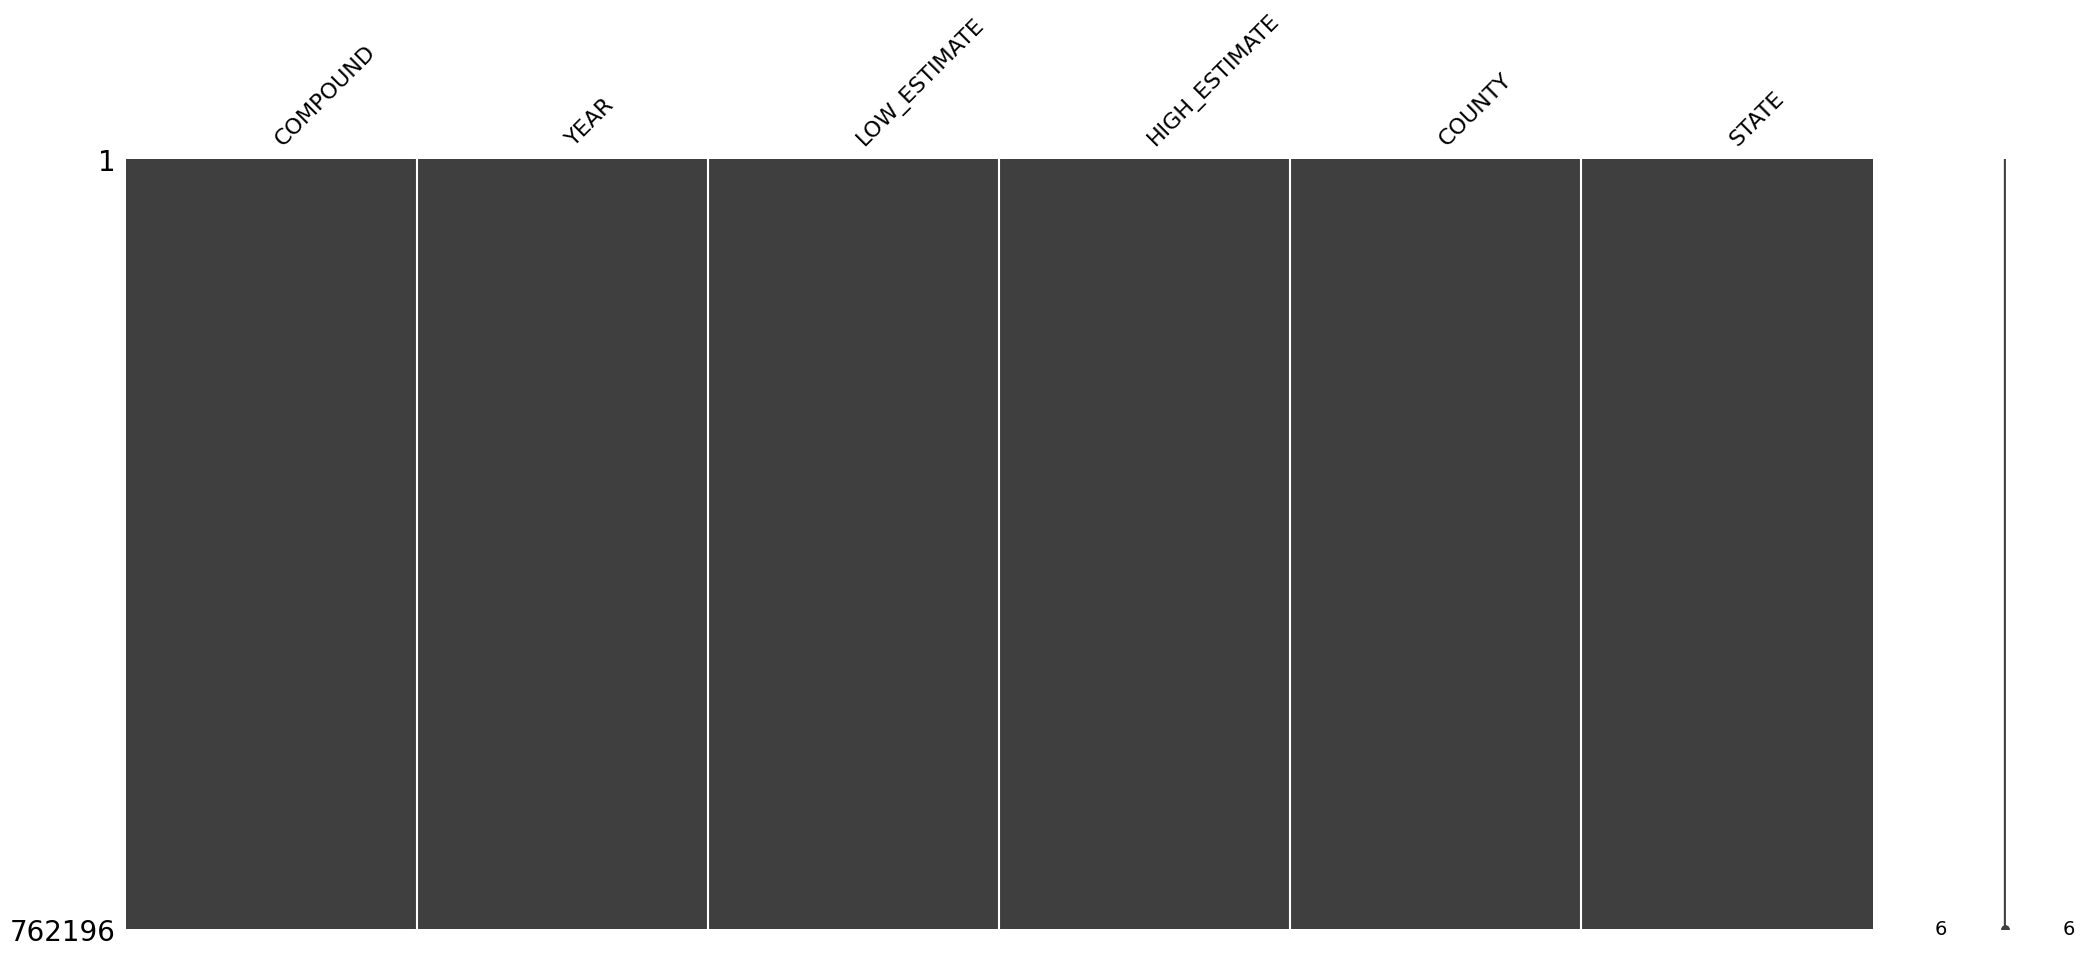

In [39]:
msno.matrix(df)
plt.tight_layout()
plt.show()

In [40]:
df_summary = df.describe().style.background_gradient(cmap='viridis') #Making a summary of final dataframe
df_summary

,YEAR,LOW_ESTIMATE,HIGH_ESTIMATE
count,762196.000000,762196.000000,762196.000000
mean,2014.485128,944.567710,1182.862867
std,0.499779,11980.571723,15692.031480
min,2014.000000,0.000000,0.000000
25%,2014.000000,0.000000,1.500000
50%,2014.000000,1.000000,16.400000
75%,2015.000000,38.800000,140.500000
max,2015.000000,2283969.100000,5507145.800000


We can see that our estimate data is heavily skewed to the right.

In [41]:
df.sample(5) #Sampling final dataframe to get an idea

,COMPOUND,YEAR,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
294130,Propiconazole,2014,47.3,141.0,Greene County,Illinois
692692,Quizalofop,2015,0.0,53.9,Bourbon County,Kansas
116010,Diflubenzuron,2014,8.1,31.2,Miami-Dade County,Florida
299820,Prothioconazole,2014,8.0,12.3,Greenwood County,Kansas
96872,Cyhalothrin-Lambda,2014,9.6,64.7,Jefferson County,Kansas


# Total Pesticide Usage by State

Here we analyse the total amount of kilograms of pestice applied per state for both years.

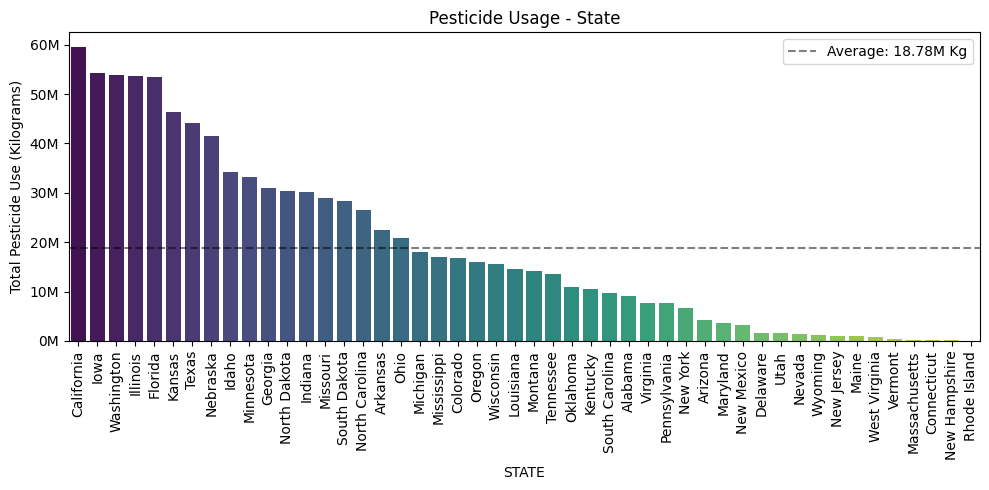

California applied the most amount of pesticides with 59M kilograms
Rhode Island applied the least amount of pesticides with 26339 kilograms


In [42]:
#Preparing our data for plotting
df_grp_state = df.groupby('STATE').agg(HIGH_ESTIMATE_TOTAL=('HIGH_ESTIMATE', 'sum')).sort_values(by='HIGH_ESTIMATE_TOTAL', ascending=False)
mean_state = np.mean(df_grp_state['HIGH_ESTIMATE_TOTAL'])

#Plotting our data
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_grp_state, x=df_grp_state.index, y=df_grp_state['HIGH_ESTIMATE_TOTAL'], palette='viridis', order=df_grp_state.index)
plt.xticks(rotation=90)
plt.ylabel('Total Pesticide Use (Kilograms)')
plt.title('Pesticide Usage - State')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x/1e6):.0f}M"))
ax.axhline(mean_state, color='black', linestyle='--', label=f'Average: {mean_state/1e6:.2f}M Kg', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

max_state = df_grp_state.index[0]
max_state_value = int(df_grp_state['HIGH_ESTIMATE_TOTAL'][0]/1e6)
min_state = df_grp_state.index[-1]
min_state_value = int(df_grp_state['HIGH_ESTIMATE_TOTAL'][-1])
print(f"{max_state} applied the most amount of pesticides with {max_state_value}M kilograms")
print(f"{min_state} applied the least amount of pesticides with {min_state_value} kilograms")

# Total Pesticide Usage by County

Here we investigate the counties that applied the most and least pesticide for both years.

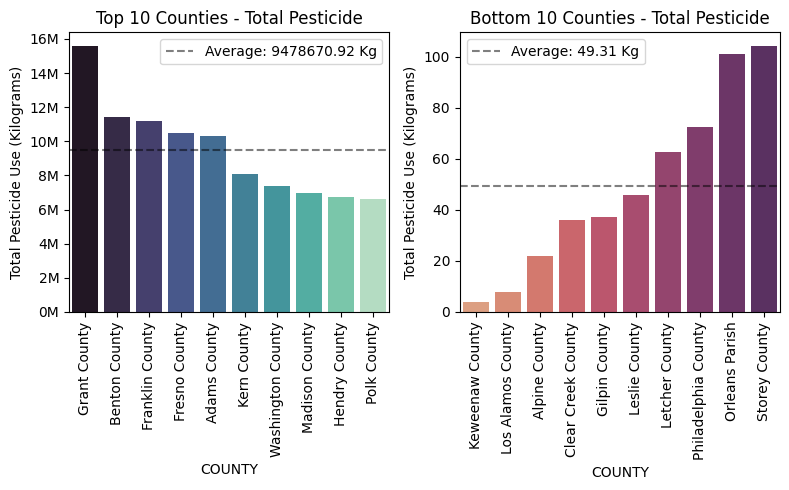

Grant County used the most pesticide with 15M kilograms
Keweenaw County used the least pesticide with 3 kilograms


In [43]:
#Preparing our data for plotting
df_grp_county = df.groupby('COUNTY').agg(HIGH_ESTIMATE_TOTAL=('HIGH_ESTIMATE', 'sum')).sort_values(by='HIGH_ESTIMATE_TOTAL', ascending=False)
top10_county = df_grp_county.nlargest(10, 'HIGH_ESTIMATE_TOTAL')
bottom10_county = df_grp_county.nsmallest(10, 'HIGH_ESTIMATE_TOTAL')
top10_mean = np.mean(top10_county['HIGH_ESTIMATE_TOTAL'])
bottom10_mean = np.mean(bottom10_county['HIGH_ESTIMATE_TOTAL'])

#Plotting our data with a function
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

def county_plot(ax, data, title, color, order, axislabelformat, mean):
    sns.barplot(x=data.index, y=data['HIGH_ESTIMATE_TOTAL'], palette=color, order=order, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Total Pesticide Use (Kilograms)')
    ax.set_xticklabels(data.index, rotation=90)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(axislabelformat))
    ax.axhline(mean, color='black', linestyle='--', label=f'Average: {mean:.2f} Kg', alpha=0.5)
    ax.legend()
    
county_plot(ax[0], top10_county, 'Top 10 Counties - Total Pesticide', 'mako', top10_county.index, lambda x, pos: f"{int(x/1e6):.0f}M", top10_mean)
county_plot(ax[1], bottom10_county, 'Bottom 10 Counties - Total Pesticide', 'flare', bottom10_county.index, lambda x, pos: f"{int(x):.0f}", bottom10_mean)

plt.tight_layout()
plt.show()

max_county = top10_county.index[0]
max_county_value = int(top10_county['HIGH_ESTIMATE_TOTAL'][0]/1e6)
min_county = bottom10_county.index[0]
min_county_value = int(bottom10_county['HIGH_ESTIMATE_TOTAL'][0])

print(f"{max_county} used the most pesticide with {max_county_value}M kilograms")
print(f"{min_county} used the least pesticide with {min_county_value} kilograms")

# Total Pesticide Use by Compound

Here we check the most used pesticides by compound.

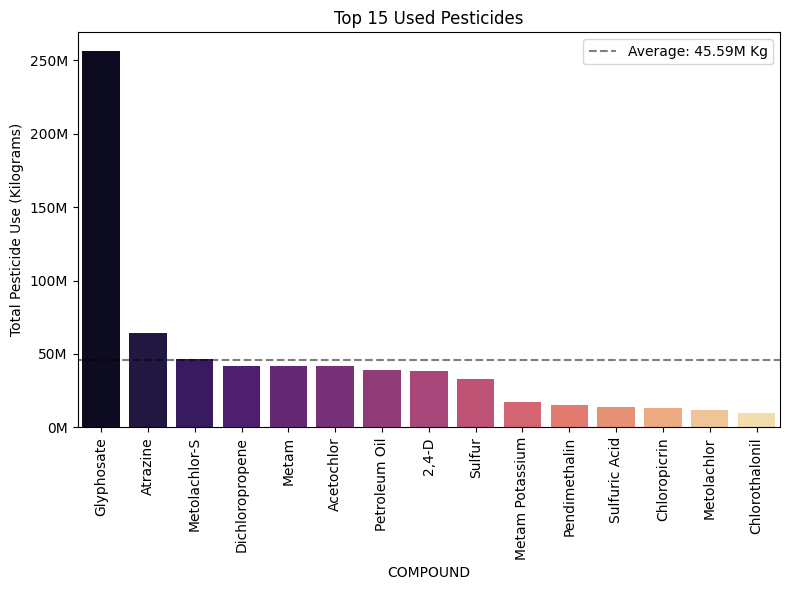

Glyphosate was the most used compound with 256M kilograms


In [44]:
#Preparing our data for plotting
df_grp_compound = df.groupby('COMPOUND').agg(HIGH_ESTIMATE_TOTAL=('HIGH_ESTIMATE', 'sum')).sort_values(by='HIGH_ESTIMATE_TOTAL', ascending=False)
top15_grp_compound = df_grp_compound.nlargest(15, 'HIGH_ESTIMATE_TOTAL')
mean_15 = np.mean(top15_grp_compound['HIGH_ESTIMATE_TOTAL']) #Mean for reference line

#Plotting our data
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top15_grp_compound, x=top15_grp_compound.index, y=top15_grp_compound['HIGH_ESTIMATE_TOTAL'], order=top15_grp_compound.index, palette='magma')
plt.title('Top 15 Used Pesticides')
plt.ylabel('Total Pesticide Use (Kilograms)')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x/1e6):.0f}M"))
ax.axhline(mean_15, color='black', linestyle='--', label=f'Average: {mean_15/1e6:.2f}M Kg', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

max_pesticide = top15_grp_compound.index[0]
max_pesticide_value = int(top15_grp_compound['HIGH_ESTIMATE_TOTAL'][0]/1e6)
print(f"{max_pesticide} was the most used compound with {max_pesticide_value}M kilograms")

# Pesticide Use Trends for 2014 and 2015

Which Pesticides were used the most for each year, 2014 and 2015?

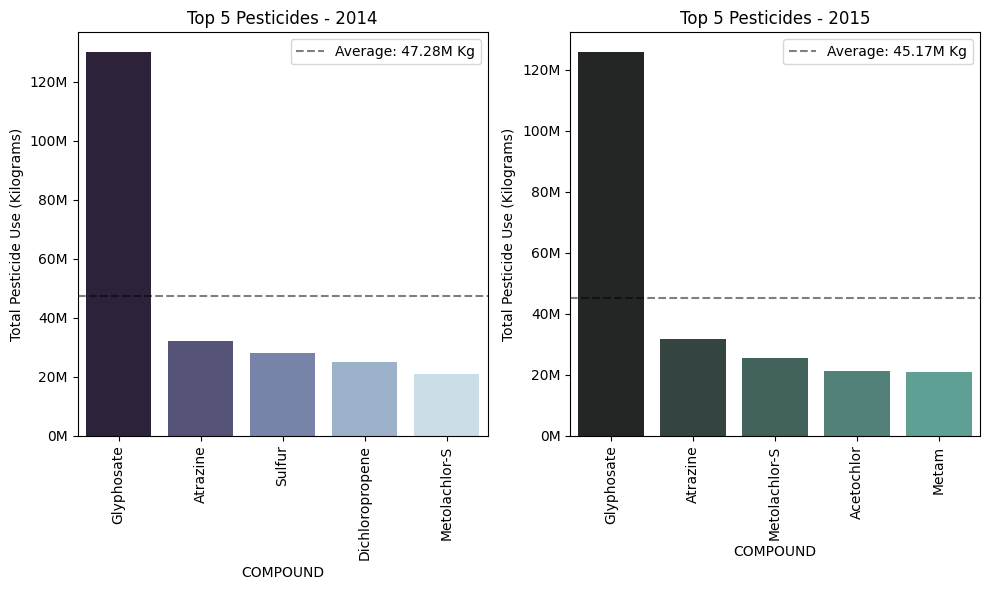

Glyphosate was the most used compound for 2014 with 130M kilograms
Glyphosate was the most used compound for 2015 with 126M kilograms


In [45]:
#Preparing our data for plotting
compound_sums = df.groupby(['COMPOUND', 'YEAR'])['HIGH_ESTIMATE'].sum().reset_index().set_index('COMPOUND')
top5_2014 = compound_sums[compound_sums['YEAR'] == 2014].nlargest(5, 'HIGH_ESTIMATE')
top5_2015 = compound_sums[compound_sums['YEAR'] == 2015].nlargest(5, 'HIGH_ESTIMATE')
mean_2014 = np.mean(top5_2014['HIGH_ESTIMATE']) #Mean for reference line
mean_2015 = np.mean(top5_2015['HIGH_ESTIMATE']) #Mean for reference line

#Plotting our data with a function
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

def barplot_year_pesticide(ax, data, col, color, title, order, axislabelformat, mean):
    sns.barplot(ax=ax, x=data.index, y=data[col], palette=color, order=order)
    ax.set_title(title)
    ax.set_ylabel('Total Pesticide Use (Kilograms)')
    ax.set_xticklabels(data.index, rotation=90)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(axislabelformat))
    ax.axhline(mean, color='black', linestyle='--', label=f'Average: {mean/1e6:.2f}M Kg', alpha=0.5)
    ax.legend()
    
barplot_year_pesticide(ax[0], top5_2014, 'HIGH_ESTIMATE', 'ch:s=.25,rot=-.25_r', 'Top 5 Pesticides - 2014', top5_2014.index, lambda x, pos: f"{int(x/1e6):.0f}M", mean_2014)
barplot_year_pesticide(ax[1], top5_2015, 'HIGH_ESTIMATE', 'dark:#5A9', 'Top 5 Pesticides - 2015', top5_2015.index, lambda x, pos: f"{int(x/1e6):.0f}M", mean_2015)

plt.tight_layout()
plt.show()

max_compound_2014 = top5_2014.index[0]
max_compound_2014_value = int(top5_2014['HIGH_ESTIMATE'][0]/1e6)
max_compound_2015 = top5_2015.index[0]
max_compound_2015_value = int(top5_2015['HIGH_ESTIMATE'][0]/1e6)

print(f"{max_compound_2014} was the most used compound for 2014 with {max_compound_2014_value}M kilograms")
print(f"{max_compound_2015} was the most used compound for 2015 with {max_compound_2015_value}M kilograms")

**Glyphosate** is a widely used herbicide, particularly in agriculture, to control weeds. It's the active ingredient in many herbicides, including Roundup. Concerns about its health effects have grown due to its widespread use. Some studies suggest glyphosate exposure may increase the risk of cancer, particularly non-Hodgkin lymphoma, although the scientific community remains divided on this. The International Agency for Research on Cancer (IARC) classified it as "probably carcinogenic to humans," while other agencies, like the U.S. EPA, consider it safe when used according to regulations. Glyphosate exposure may also disrupt gut microbiota and lead to other health issues, but more research is needed.

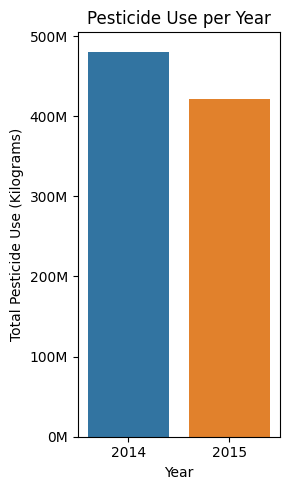

2014 was the year with most pesticide usage at 480M kg compared to 2015 at 420 M kg
That is 14 % more than 2015!


In [46]:
#Grouping Data
pesticide_year = df.groupby('YEAR').agg(HIGH_ESTIMATE_TOTAL=('HIGH_ESTIMATE', 'sum'))

#Plotting
plt.figure(figsize=(3, 5))
ax = sns.barplot(x=pesticide_year.index, y=pesticide_year['HIGH_ESTIMATE_TOTAL'])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x/1e6):.0f}M"))
ax.set_ylabel('Total Pesticide Use (Kilograms)')
ax.set_xlabel('Year')
ax.set_title('Pesticide Use per Year')
plt.tight_layout()
plt.show()

max_year = pesticide_year.index[0]
max_year_value = int(pesticide_year.loc[pesticide_year.index[0], 'HIGH_ESTIMATE_TOTAL']/1e6)
min_year = pesticide_year.index[1]
min_year_value = int(pesticide_year.loc[pesticide_year.index[1], 'HIGH_ESTIMATE_TOTAL']/1e6)
year_percentage = int(((max_year_value / min_year_value) * 100) - 100)

print(f"{max_year} was the year with most pesticide usage at {max_year_value}M kg compared to {min_year} at {min_year_value} M kg")
print(f"That is {year_percentage} % more than {min_year}!")

# Most Used Pesticides by California

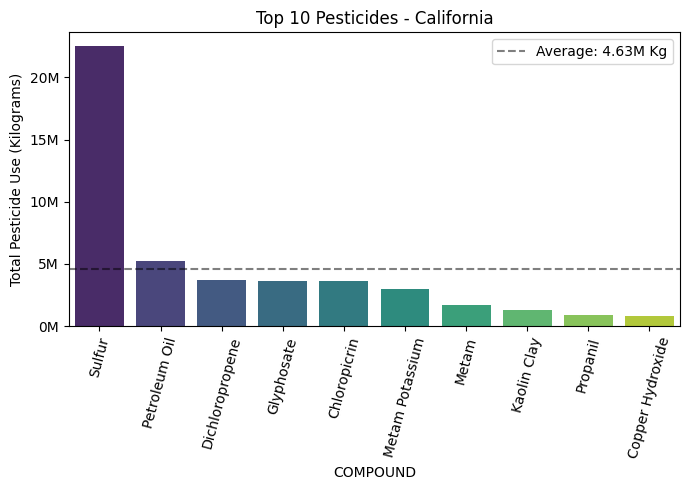

Sulfur was the most used pesticide in California with 22M kilograms


In [47]:
#Preparing our data for plotting
df_filtered = df.loc[df['STATE'] == 'California']
df_filtered_grp = df_filtered.groupby('COMPOUND').agg(HIGH_ESTIMATE_TOTAL=('HIGH_ESTIMATE', 'sum'))
top10_ca_compounds = df_filtered_grp.nlargest(10, 'HIGH_ESTIMATE_TOTAL')
mean_top10 = np.mean(top10_ca_compounds['HIGH_ESTIMATE_TOTAL']) #Mean for reference line 

#Plotting our data
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=top10_ca_compounds.index, y=top10_ca_compounds['HIGH_ESTIMATE_TOTAL'], palette='viridis', order=top10_ca_compounds.index)
plt.ylabel('Total Pesticide Use (Kilograms)')
plt.title('Top 10 Pesticides - California')
plt.xticks(rotation=75)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x/1e6):.0f}M"))
plt.axhline(mean_top10, color='black', linestyle='--', label=f'Average: {mean_top10/1e6:.2f}M Kg', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

max_ca_pesticide = top10_ca_compounds.index[0]
max_ca_pesticide_value = int(top10_ca_compounds['HIGH_ESTIMATE_TOTAL'][0]/1e6)
print(f"{max_ca_pesticide} was the most used pesticide in California with {max_ca_pesticide_value}M kilograms")

**Sulfur** (or sulphur) is a naturally occurring element essential for life, playing a critical role in protein synthesis and enzyme function in humans. It's used in agriculture primarily as a fungicide and insecticide, and as a soil amendment to lower pH for plant growth.

In terms of health effects, sulfur is generally considered low in toxicity. However, exposure to sulfur compounds like sulfur dioxide (a gas produced by burning sulfur-containing fuels) can irritate the respiratory system, causing coughing, shortness of breath, or aggravating conditions like asthma. Chronic exposure to high levels of sulfur compounds can lead to more serious respiratory issues.

# Distribution for Low and High Methods

Here we assess the distribution of both Estimation Methods using logaritmical transformation and calculating their kurtosis. Since we have values between 0 and 1, using a logaritmic transformation would give us negative values so we use the numpy function np.log1p whic adds a constant thus preventing negative values.

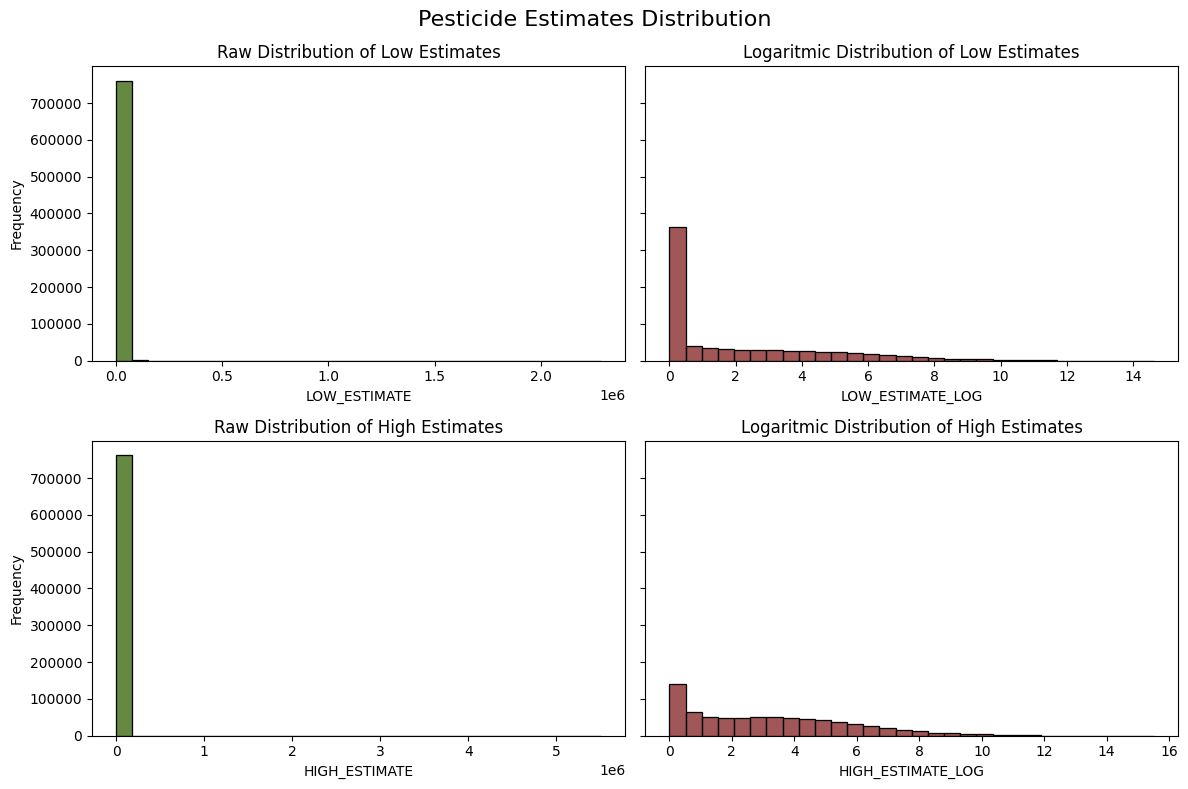

Low Estimates kurtosis is Leptokurtic: Heavy tails; more outliers than normal
High Estimates kurtosis is Platykurtic: Light tails; fewer outliers than normal


In [48]:
#Logaritmic transformation with constant
df['LOW_ESTIMATE_LOG'] = np.log1p(df['LOW_ESTIMATE'])
df['HIGH_ESTIMATE_LOG'] = np.log1p(df['HIGH_ESTIMATE'])

#Plotting raw variables and their log transformations with a function
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(12, 8))
fig.suptitle('Pesticide Estimates Distribution', fontsize=16)

def estimate_dist(ax, data, col, color, title):
    sns.histplot(data[col], color=color, bins=30, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    
estimate_dist(ax[0, 0], df, 'LOW_ESTIMATE', '#336102', 'Raw Distribution of Low Estimates')
estimate_dist(ax[0, 1], df, 'LOW_ESTIMATE_LOG', '#821d20', 'Logaritmic Distribution of Low Estimates')
estimate_dist(ax[1, 0], df, 'HIGH_ESTIMATE', '#336102', 'Raw Distribution of High Estimates')
estimate_dist(ax[1, 1], df, 'HIGH_ESTIMATE_LOG', '#821d20', 'Logaritmic Distribution of High Estimates')
    
plt.tight_layout()
plt.show()

#Calculating kurtosis for both methods
low_estimate_kurtosis = kurtosis(df['LOW_ESTIMATE_LOG'])
high_estimate_kurtosis = kurtosis(df['HIGH_ESTIMATE_LOG'])

if low_estimate_kurtosis > 0:
    print(f"Low Estimates kurtosis is Leptokurtic: Heavy tails; more outliers than normal")
elif low_estimate_kurtosis < 0:
    print(f"Low Estimates kurtosis is Platykurtic: Light tails; fewer outliers than normal")
else:
    print(f"Low Estimates kurtosis is Mesokurtic: Similar to normal distribution; moderate tails")
    
if high_estimate_kurtosis > 0:
    print(f"High Estimates kurtosis is Leptokurtic: Heavy tails; more outliers than normal")
elif high_estimate_kurtosis < 0:
    print(f"High Estimates kurtosis is Platykurtic: Light tails; fewer outliers than normal")
else:
    print(f"High Estimates kurtosis is Mesokurtic: Similar to normal distribution; moderate tails")

Low estimates kurtosis is Leptokurtic due to the high number of zeroes.

# Estimates Distribution by State

Here we plot the high estimates distributions for the top 6 states by pesticide usage.

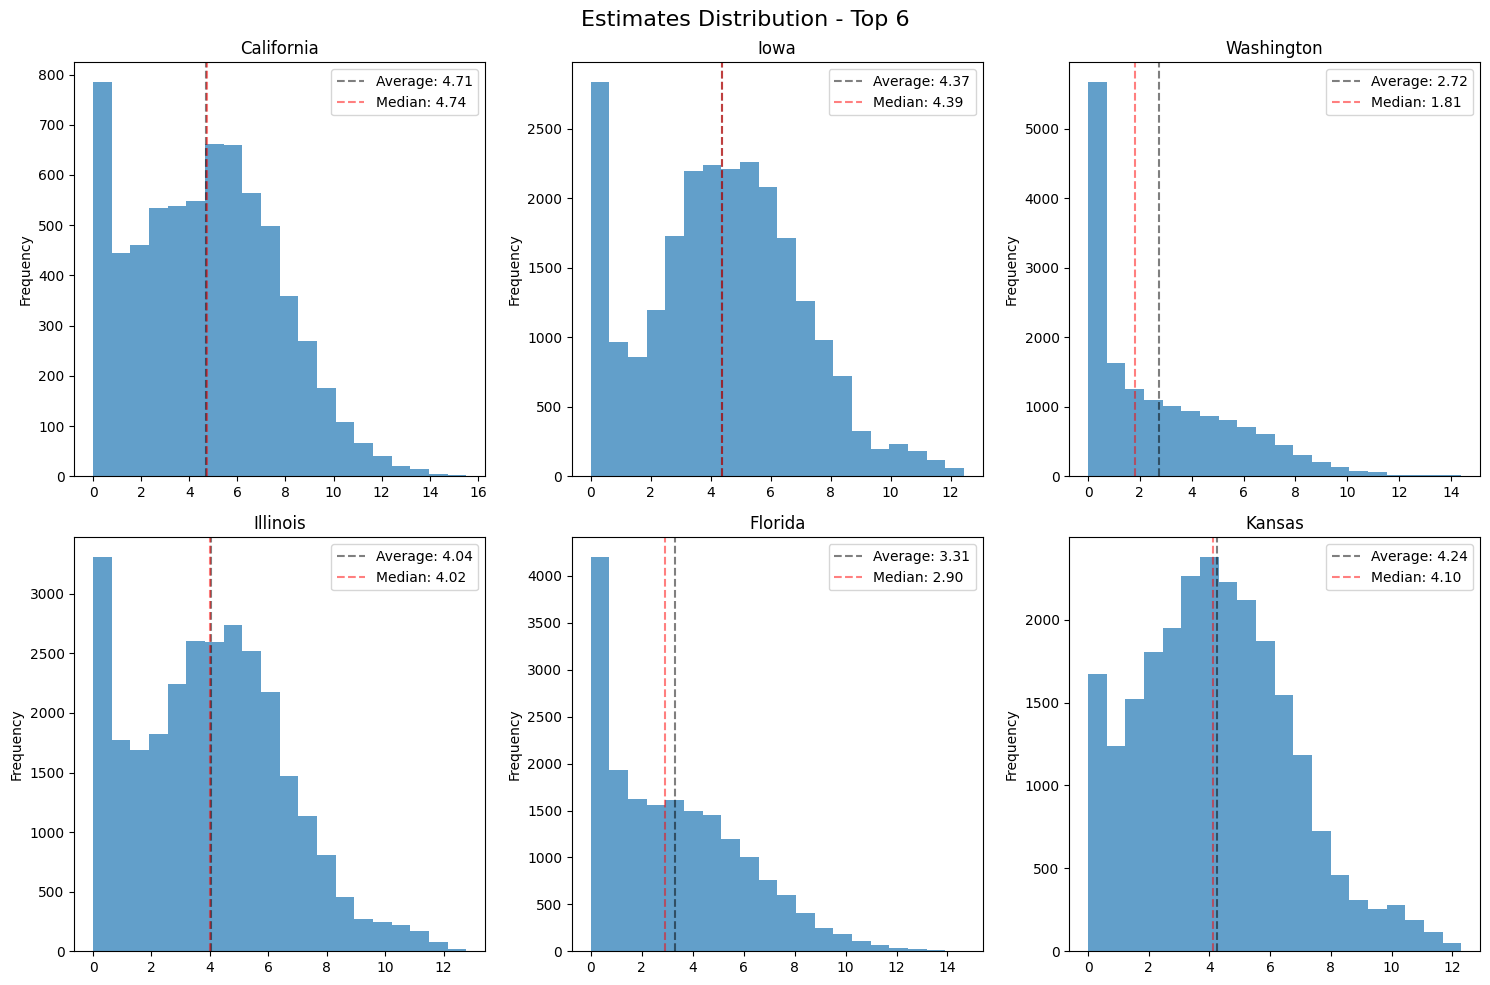

In [49]:
#Obtaining top 6 states by HIGH_ESTIMATE_TOTAL
top6_states = df_grp_state.nlargest(6, 'HIGH_ESTIMATE_TOTAL').index

#Plotting our distributions by state
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Estimates Distribution - Top 6', fontsize=16)

#Defining function for each distribution
def state_hist(ax, data, col, title, state_mean, state_median):
    ax.hist(data[col], bins=20, alpha= 0.7)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.axvline(state_mean, color='black', linestyle='--', label=f'Average: {state_mean:.2f}', alpha=0.5)
    ax.axvline(state_median, color='red', linestyle='--', label=f'Median: {state_median:.2f}', alpha=0.5)
    ax.legend()

#Looping over each top 6 state index and extracting the necessary information from each of them
for i, state in enumerate(top6_states):
    state_data = df[df['STATE'] == state]
    state_mean = np.mean(state_data['HIGH_ESTIMATE_LOG'])
    state_median = np.median(state_data['HIGH_ESTIMATE_LOG'])
    state_hist(ax[i // 3, i % 3], state_data, 'HIGH_ESTIMATE_LOG', state, state_mean, state_median)

plt.tight_layout()
plt.show()

Clearly, we can see that values equal or close to zero for both low and high method introduce bias to our distributions whether be estimates themselves or subdividing by state. We also see that Washington state had more skewedness to the right compared to the other five states.

# Estimates Distribution by Compound

Here the plot the distributions of the top 10 pesticides using boxplots.

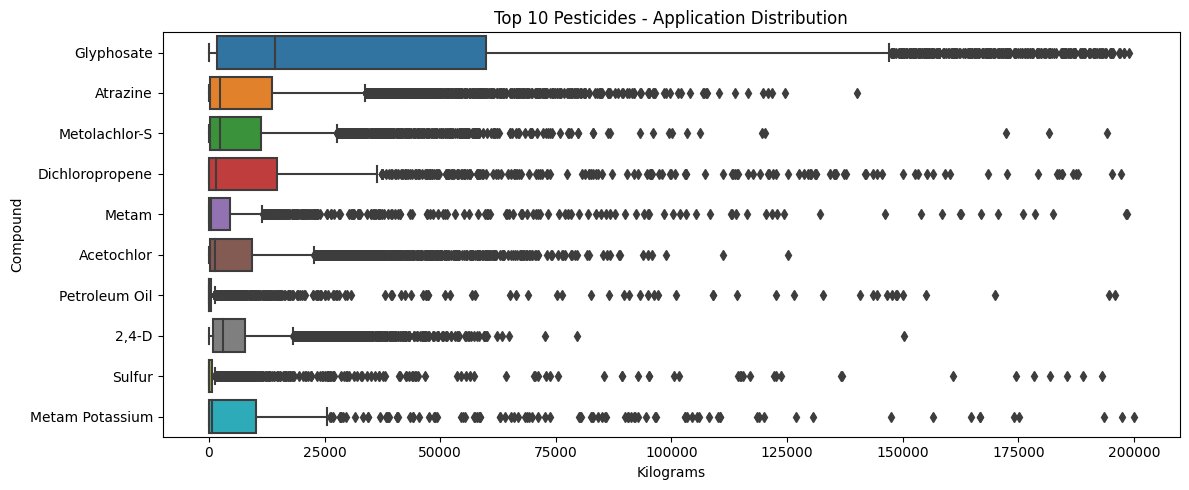

In [50]:
top10_compounds = df_grp_compound.nlargest(10, 'HIGH_ESTIMATE_TOTAL').index
df_top10 = df[df['COMPOUND'].isin(top10_compounds)]
df_top10 = df_top10.loc[df_top10['HIGH_ESTIMATE'] < 200000] #We filter very large values to make our plot more visible

fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x=df_top10['HIGH_ESTIMATE'], y=df_top10['COMPOUND'], order=top10_compounds, ax=ax)
ax.set_xlabel('Kilograms')
ax.set_ylabel('Compound')
ax.set_title('Top 10 Pesticides - Application Distribution')
plt.tight_layout()
plt.show()

We can see that each compound has many outliers while the majority of the applications tightly packed around values close to zero. We can conclude that there are many big producers that applied large amounts of pesticide while that majority are small producers with small capacity for compound application. Of each of these, Glyphosate saw more usage at small doses while Petroleum Oil distribution saw the smallest doses for the top 10.

# Comparison of Low and High Estimates

Here we compare the two estimation methods using spearman correlation and Mann-Whitney U Test due to the following conditions:

* The two groups have a non-normal distribution.
* They are independent of each other.
* We are comparing two groups.

In [51]:
#Correlation
corr = df[['LOW_ESTIMATE', 'HIGH_ESTIMATE']].corr('spearman')
corr_value = corr.iloc[0, 1]

if corr_value > 0.5:
    print(f"There is a moderate to high correlation: {corr_value}")
elif corr_value > 0.9:
    print(f"There is a high correlation: {corr_value}")
elif corr_value < 0.5:
    print(f"There is a low to moderate correlation: {corr_value}")
elif corr_value < 0.1:
    print(f"There is a low correlation: {corr_value}")
elif corr_value == 0:
    print(f"There is no correlation: {corr_value}")
    
#Hypothesis test
stat, p_value = mannwhitneyu(df['LOW_ESTIMATE'], df['HIGH_ESTIMATE'])

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05 #Setting alpha value
if p_value < alpha:
    print("Reject the null hypothesis. The two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis. The two groups are not significantly different.")

There is a moderate to high correlation: 0.6031525944388334
Mann-Whitney U test statistic: 192429849734.0
P-value: 0.0
Reject the null hypothesis. The two groups are significantly different.


# Conclusions

Glyphosate, the most widely used pesticide, is generally considered safe when applied in recommended quantities. However, ongoing research is needed to fully understand its long-term health impacts, along with those of other pesticides. A comprehensive evaluation of pesticide use must include further data on health outcomes at both the county and state levels to better assess potential risks and guide policy-making. Accurate, localized health information is essential for developing targeted interventions and ensuring safer agricultural practices.